## Visualization using matplotlib

In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

#Use to hide unimportant or unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

spark = SparkSession.builder.appName("Project").getOrCreate()

df = spark.read.csv("netflix_titles.csv", header= True, inferSchema=True)

df_toPd = pd.read_csv("netflix_titles.csv")
df_clean = df_toPd.dropna()
df_clean.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [2]:
#Show info about file 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [3]:
#used to return the size of the DataFrame
df_clean.shape


(5332, 12)

In [4]:
# Assuming df is your DataFrame and 'date_added' is the column containing the dates in string format
#remove leading and trailing whitespace
df_clean['date_added'] = df_clean['date_added'].str.strip()  
df_clean.dropna(subset=['date_added'])
#convert values in column 'date_added'
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], format='%B %d, %Y')

#changing the month name to month number (1 to 12)
df_clean['month'] = df_clean['date_added'].dt.month

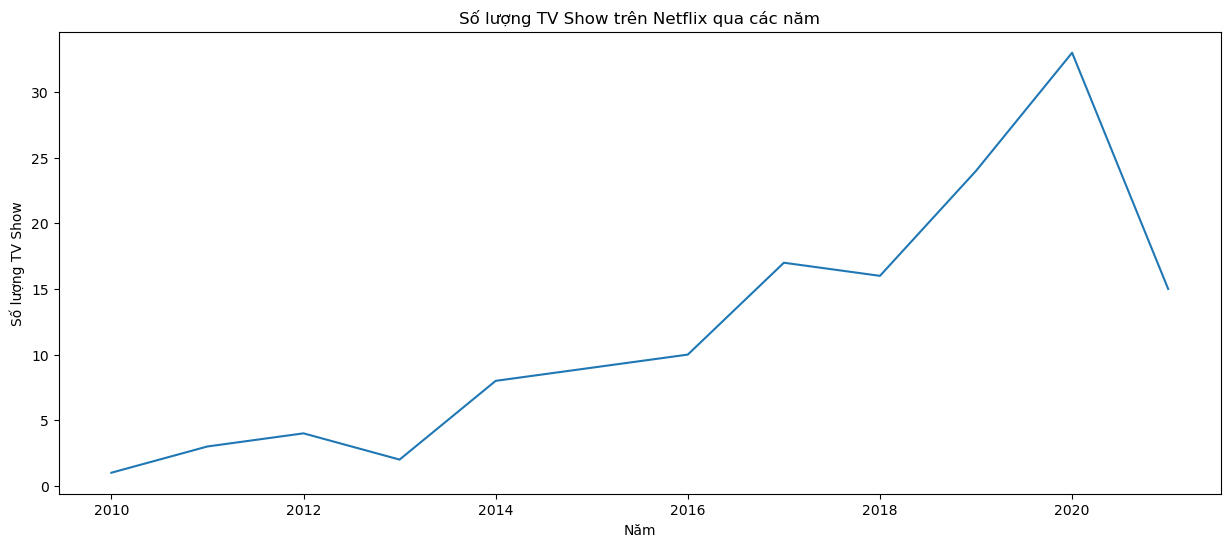

In [5]:
# Đếm số lượng TV Show trong mỗi năm từ năm 2010 trở đi
movie_counts = df_clean[df_clean['type'] == 'TV Show'][df_clean['release_year'] >= 2010].groupby('release_year')['title'].count()

# Vẽ biểu đồ
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
movie_counts.plot(kind='line')
plt.title('Số lượng TV Show trên Netflix qua các năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng TV Show')
plt.show()


## Accessories for Charts

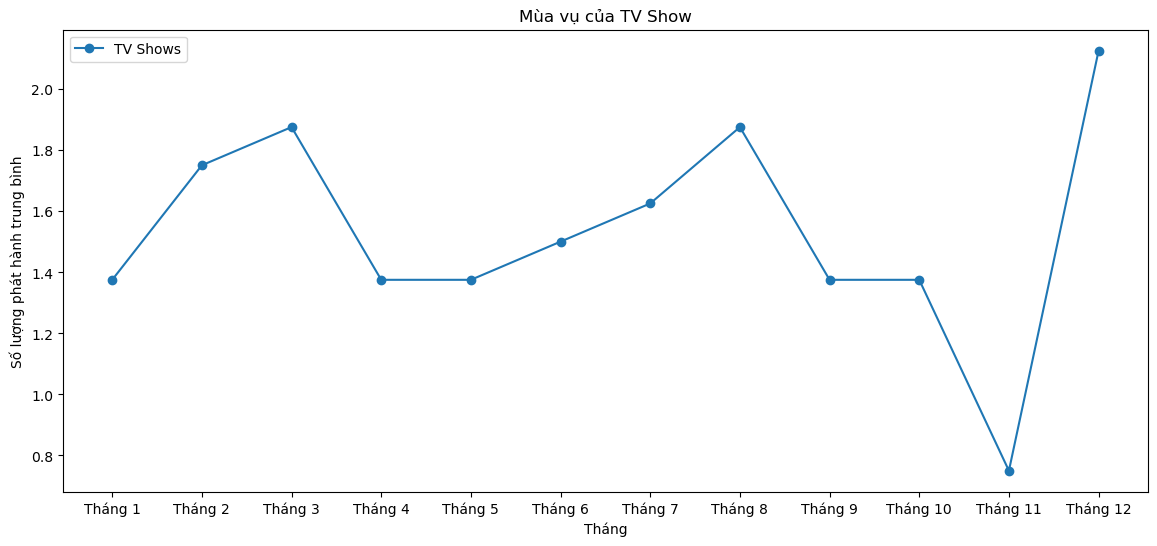

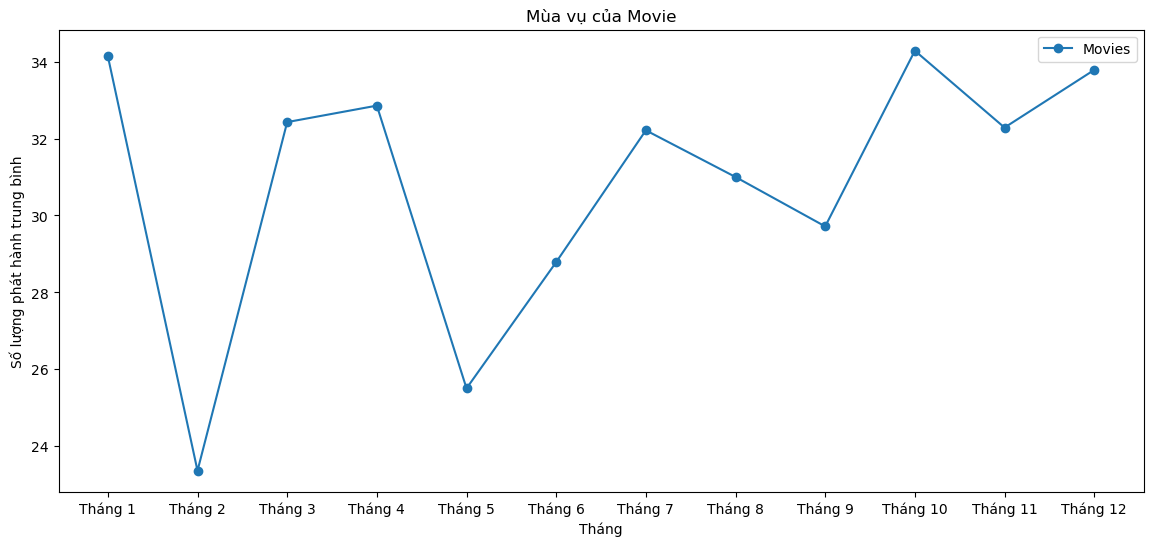

In [6]:
# Trích xuất tháng và năm từ cột 'date_added'
df_clean['month_added'] = df_clean['date_added'].dt.month
df_clean['year_added'] = df_clean['date_added'].dt.year

# Lọc dataframe
tv_shows_df = df_clean[df_clean['type'] == 'TV Show']
movies_df = df_clean[df_clean['type'] == 'Movie']

# Nhóm theo tháng và năm (groupby()); đếm số lượng phát hành (size()), và tính tổng cho mỗi thể loại
tv_shows_monthly_counts = tv_shows_df.groupby(['month_added', 'year_added']).size().unstack(fill_value=0)
movies_monthly_counts = movies_df.groupby(['month_added', 'year_added']).size().unstack(fill_value=0)

# Mùa vụ cho TV Shows
plt.figure(figsize=(14, 6))
tv_shows_monthly_counts.mean(axis=1).plot(label='TV Shows', marker='o')
plt.title('Mùa vụ của TV Show')
plt.xlabel('Tháng')
plt.ylabel('Số lượng phát hành trung bình')
plt.xticks(range(1, 13), ['Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4', 'Tháng 5', 'Tháng 6', 'Tháng 7', 'Tháng 8', 'Tháng 9', 'Tháng 10', 'Tháng 11', 'Tháng 12'])
plt.legend()
plt.show()

# Mùa vụ cho Movies
plt.figure(figsize=(14, 6))
movies_monthly_counts.mean(axis=1).plot(label='Movies', marker='o')
plt.title('Mùa vụ của Movie')
plt.xlabel('Tháng')
plt.ylabel('Số lượng phát hành trung bình')
plt.xticks(range(1, 13), ['Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4', 'Tháng 5', 'Tháng 6', 'Tháng 7', 'Tháng 8', 'Tháng 9', 'Tháng 10', 'Tháng 11', 'Tháng 12'])
plt.legend()
plt.show()


## Scatter Plot

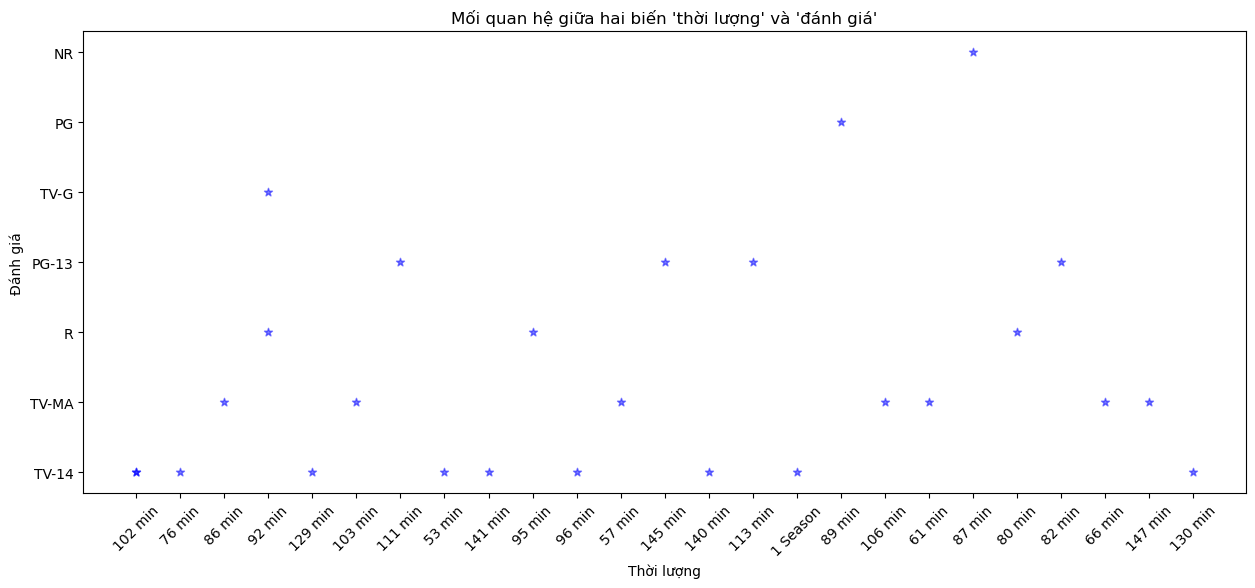

In [7]:
# Tạo df1 từ mẫu của df
df1 = df_clean.sample(frac=0.005)

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(15, 6)) 
plt.scatter(df1['duration'], df1['rating'], c='blue', marker='*', alpha=0.5)

plt.xlabel("Thời lượng")
plt.ylabel("Đánh giá")
plt.xticks(rotation=45)
plt.title("Mối quan hệ giữa hai biến 'thời lượng' và 'đánh giá'")
plt.show()


## Line Plot

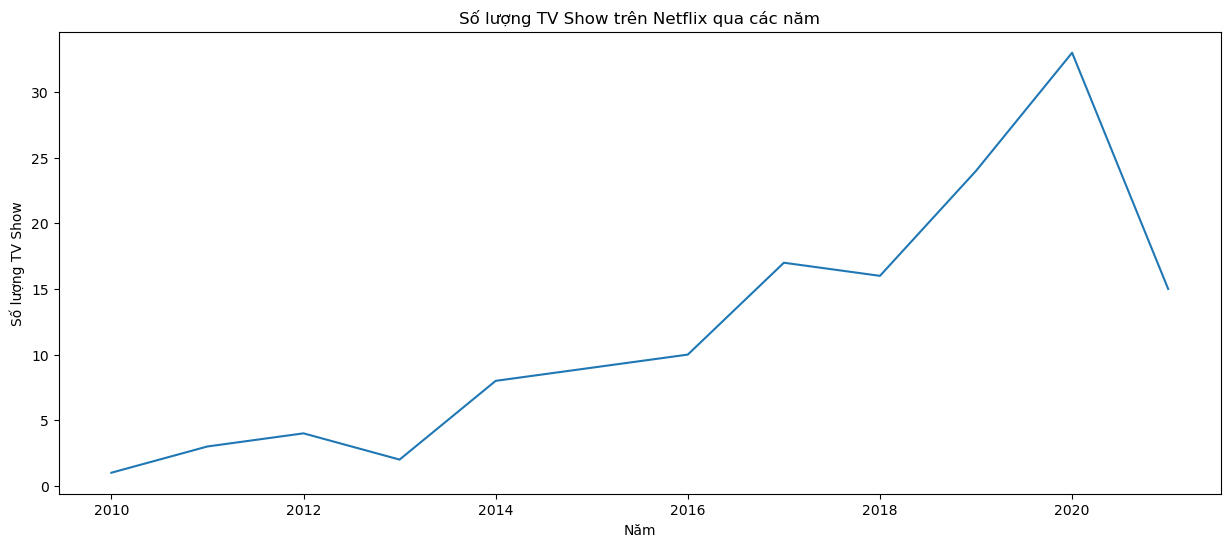

In [8]:
# Đếm số lượng TV Show trong mỗi năm từ năm 2010 trở đi
movie_counts = df_clean[df_clean['type'] == 'TV Show'][df_clean['release_year'] >= 2010].groupby('release_year')['title'].count()

# Vẽ biểu đồ
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
movie_counts.plot(kind='line')
plt.title('Số lượng TV Show trên Netflix qua các năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng TV Show')
plt.show()


## Pie Plot

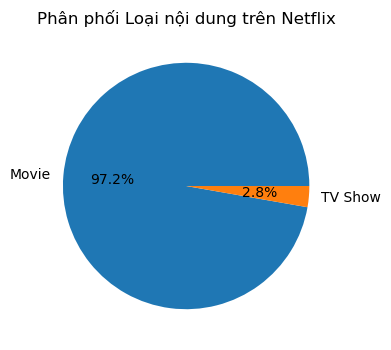

In [9]:
# Nhóm dữ liệu theo loại và tính số lượng
content_type_counts = df_clean['type'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(4, 4)) 
plt.pie(content_type_counts, labels=content_type_counts.index, autopct="%1.1f%%")  # Điều chỉnh chuỗi định dạng cho phần trăm

plt.title("Phân phối Loại nội dung trên Netflix")
plt.show()


## Bar Plot

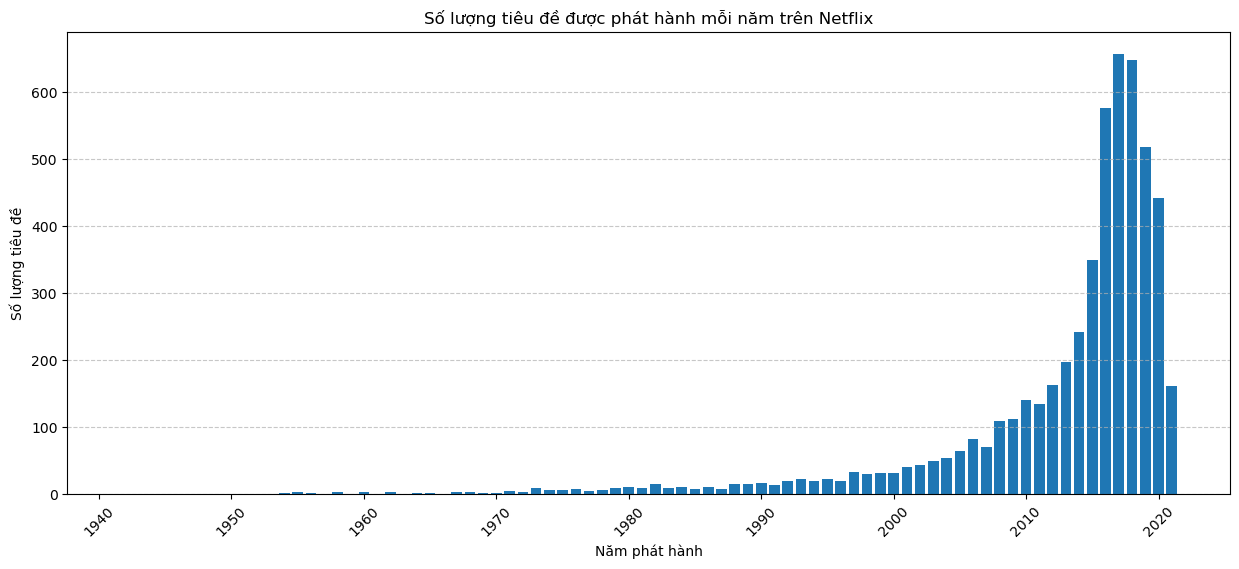

In [10]:
# Lọc dataframe để chỉ bao gồm dữ liệu từ năm 2010 trở đi
#df10 = df_clean[df_clean['release_year'] >= 2010]

# Nhóm dữ liệu theo năm phát hành và tính số lượng
release_year_counts = df_clean['release_year'].value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.bar(release_year_counts.index, release_year_counts.values)

plt.xlabel("Năm phát hành")
plt.ylabel("Số lượng tiêu đề")
plt.title(f"Số lượng tiêu đề được phát hành mỗi năm trên Netflix")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Histogram plot

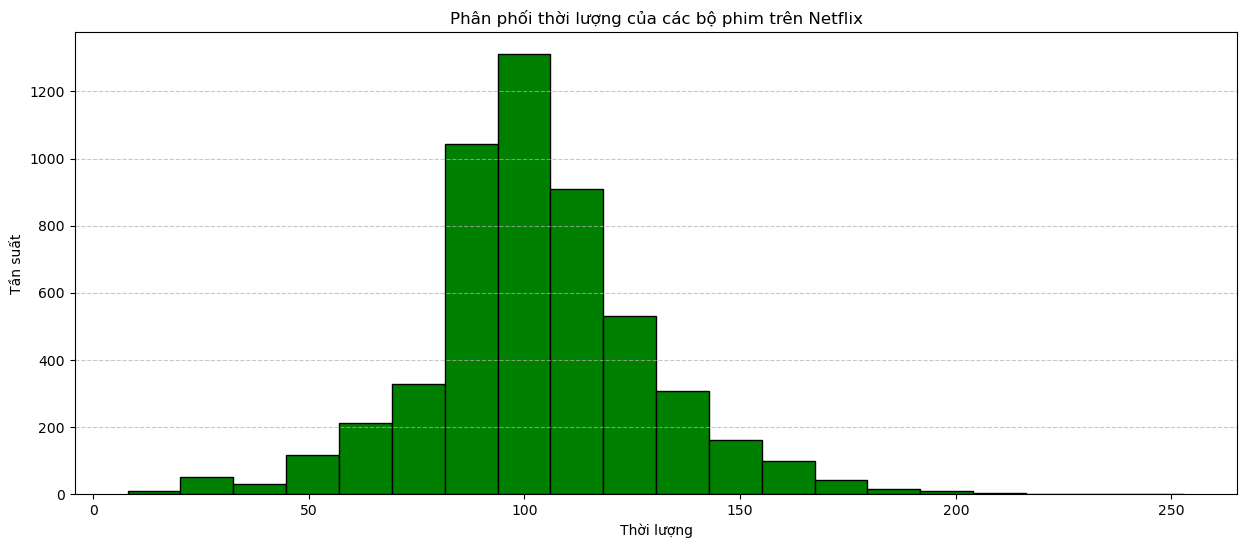

In [11]:
# Lọc dataframe để chỉ bao gồm các bộ phim (movies)
movies_df = df_clean[df_clean['type'] == 'Movie']

# Trích xuất các giá trị thời lượng và chuyển chúng thành số nguyên
movie_durations = movies_df['duration'].str.replace(' min', '')
movie_durations = movie_durations.replace('1 Season', np.nan).dropna().astype(int)

plt.figure(figsize=(15, 6))
plt.hist(movie_durations, bins=20, edgecolor='black', color='green')
plt.title('Phân phối thời lượng của các bộ phim trên Netflix')
plt.xlabel('Thời lượng')
plt.ylabel('Tần suất')
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


## Bubble plot

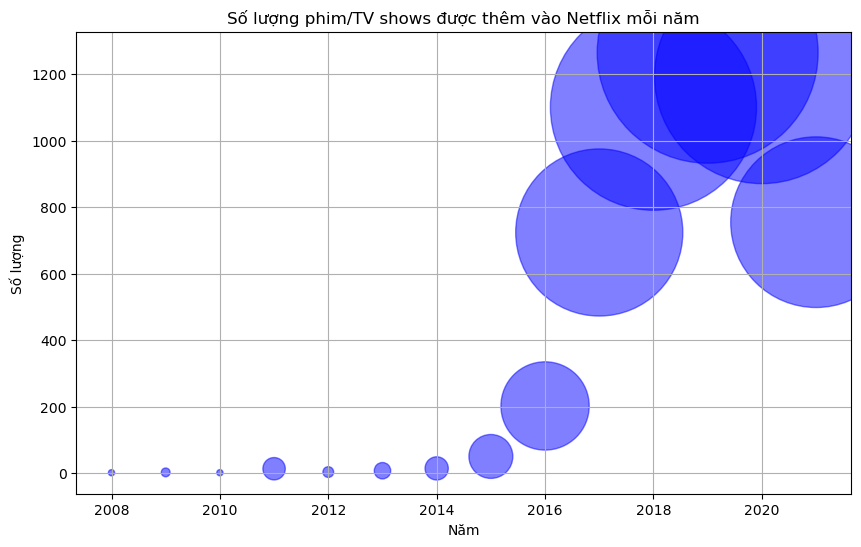

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển cột 'date_added' sang định dạng datetime, với định dạng '%B %d, %Y'
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')

# Loại bỏ các giá trị không hợp lệ (NaN) trong cột 'date_added'
df_clean = df_clean.dropna(subset=['date_added'])

# Trích xuất năm từ cột "date_added"
df_clean['year_added'] = df_clean['date_added'].dt.year

# Đếm số lượng phim hoặc chương trình TV được thêm vào mỗi năm
yearly_counts = df_clean['year_added'].value_counts().reset_index()
yearly_counts.columns = ['year', 'count']

# Vẽ biểu đồ Bubble Plot
plt.figure(figsize=(10, 6))
plt.scatter(yearly_counts['year'], yearly_counts['count'], s=yearly_counts['count']*20, alpha=0.5, color='blue')

plt.title('Số lượng phim/TV shows được thêm vào Netflix mỗi năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng')
plt.grid(True)

plt.show()


## Pandas plotting

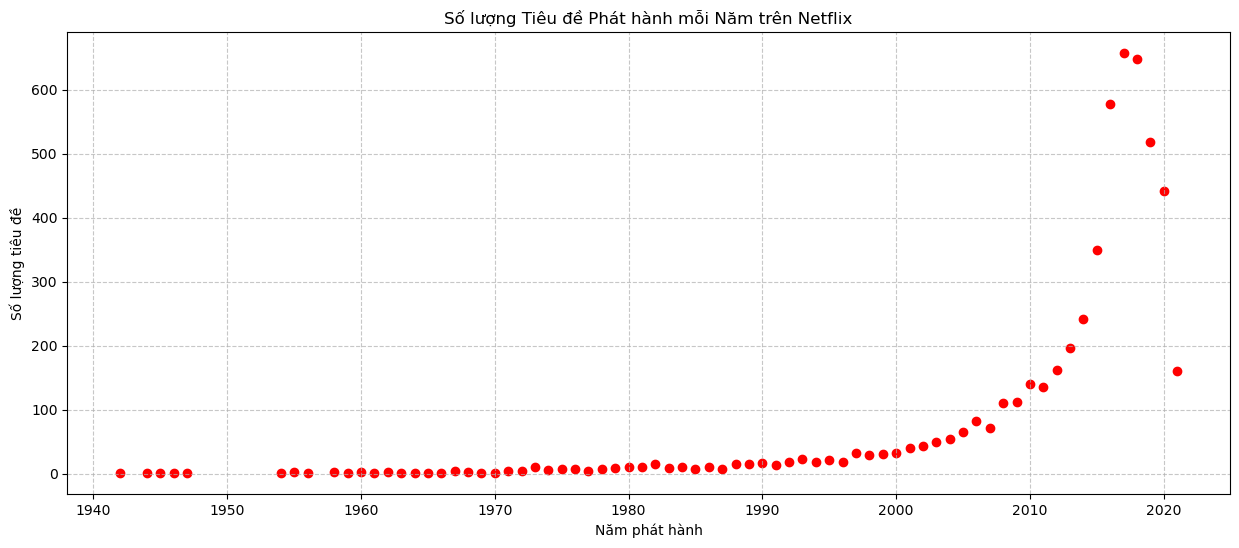

In [13]:
# Nhóm dữ liệu theo năm phát hành và tính số lượng
release_year_counts = df_clean['release_year'].value_counts()

# Lấy giá trị của release_year_counts làm chỉ số của release_year và giá trị của release_year_counts làm giá trị của mảng number_of_title
release_year = release_year_counts.index
number_of_title = release_year_counts.values

plt.figure(figsize=(15, 6)) 
plt.scatter(release_year, number_of_title, color='red')
plt.title("Số lượng Tiêu đề Phát hành mỗi Năm trên Netflix")
plt.xlabel("Năm phát hành")
plt.ylabel("Số lượng tiêu đề")
plt.grid(linestyle='--', alpha=0.7)  
plt.show()


## lm plots

In [14]:
df_clean.dtypes
df_clean.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
month                    int32
month_added              int32
year_added               int32
dtype: object

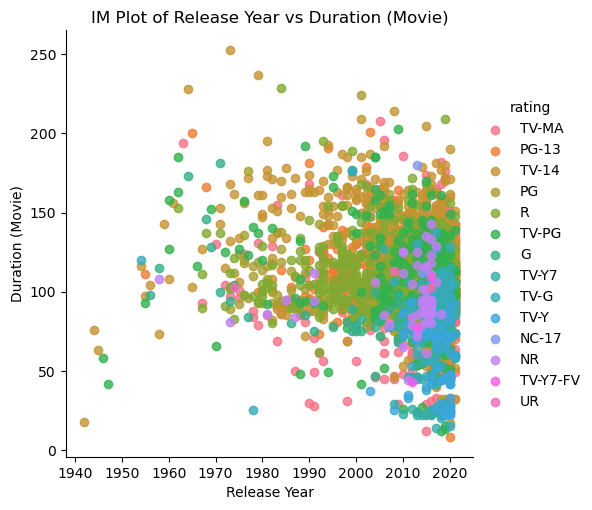

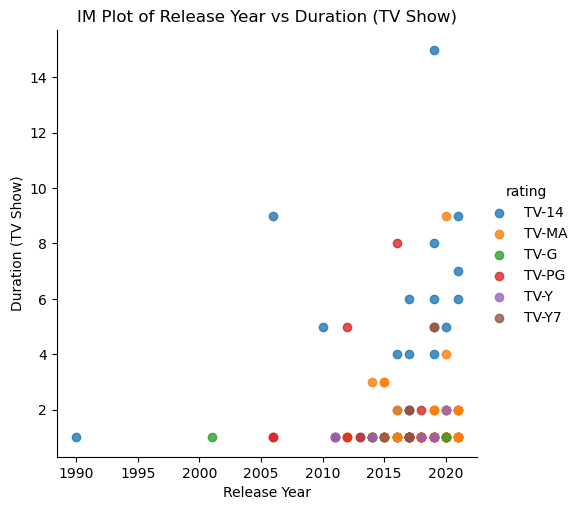

In [15]:
# Tách các giá trị trong cột 'duration' thành 'duration_value' và 'duration_unit'
df_clean[['duration_value', 'duration_unit']] = df_clean['duration'].str.extract('(\d+) (\w+)')

# Chuyển đổi các giá trị của 'duration_value' sang kiểu số
df_clean['duration_value'] = df_clean['duration_value'].astype(float)

# Vẽ biểu đồ lmplot cho thời lượng tính bằng số phút (Movies)
sns.lmplot(x='release_year', y='duration_value', data=df_clean[df_clean['type'] == 'Movie'], fit_reg=False, hue='rating')
plt.title('IM Plot of Release Year vs Duration (Movie)')
plt.xlabel('Release Year')
plt.ylabel('Duration (Movie)')
plt.show()

# Vẽ biểu đồ lmplot cho thời lượng tính bằng số season (TV Shows)
sns.lmplot(x='release_year', y='duration_value', data=df_clean[df_clean['type'] == 'TV Show'], fit_reg=False, hue='rating')
plt.title('IM Plot of Release Year vs Duration (TV Show)')
plt.xlabel('Release Year')
plt.ylabel('Duration (TV Show)')
plt.show()

## Bar Plots

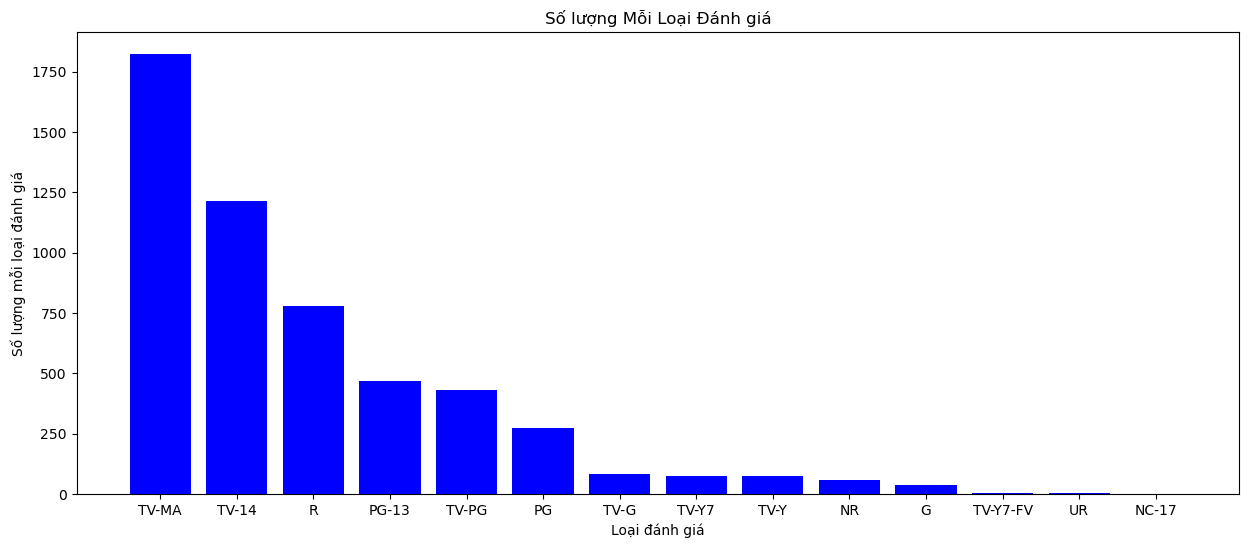

In [16]:
# Nhóm dữ liệu theo rating và tính số lượng
type_of_rating_count = df_clean['rating'].value_counts()

# Lấy giá trị của type_of_rating_count làm chỉ số của type_of_rating và giá trị của type_of_rating_count làm giá trị của mảng number_of_each_type_of_rating_count
type_of_rating = type_of_rating_count.index
number_of_each_type_of_rating_count = type_of_rating_count.values

plt.figure(figsize=(15,6))
plt.bar(type_of_rating, number_of_each_type_of_rating_count, color='blue')
plt.xlabel("Loại đánh giá")
plt.ylabel("Số lượng mỗi loại đánh giá")
plt.title("Số lượng Mỗi Loại Đánh giá")
plt.show()


## Distribution Plots

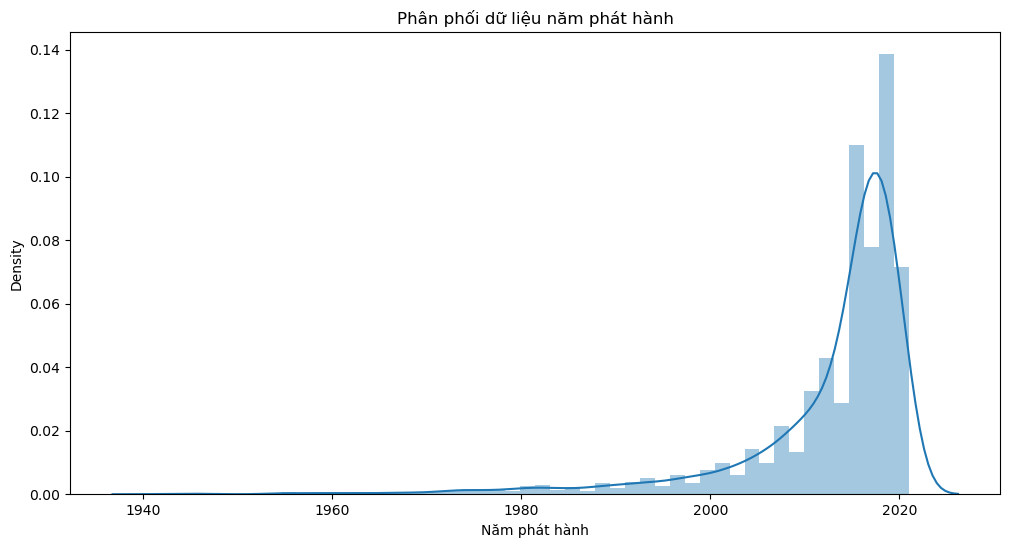

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.distplot(df_clean.release_year)

plt.xlabel("Năm phát hành")
plt.title('Phân phối dữ liệu năm phát hành')
plt.show()


## Box Plots

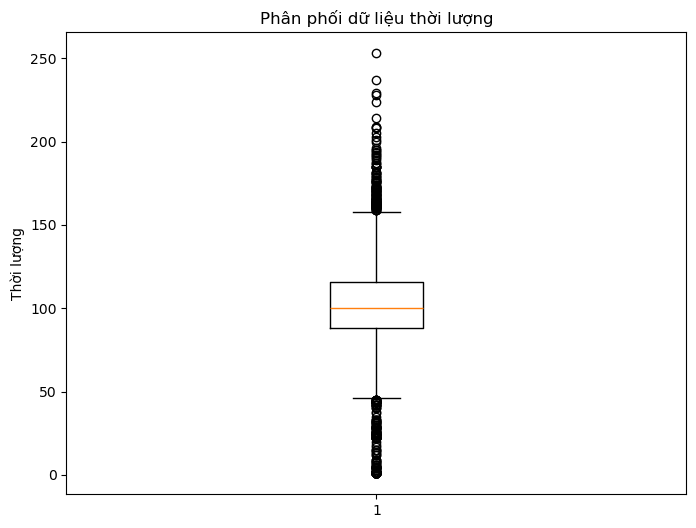

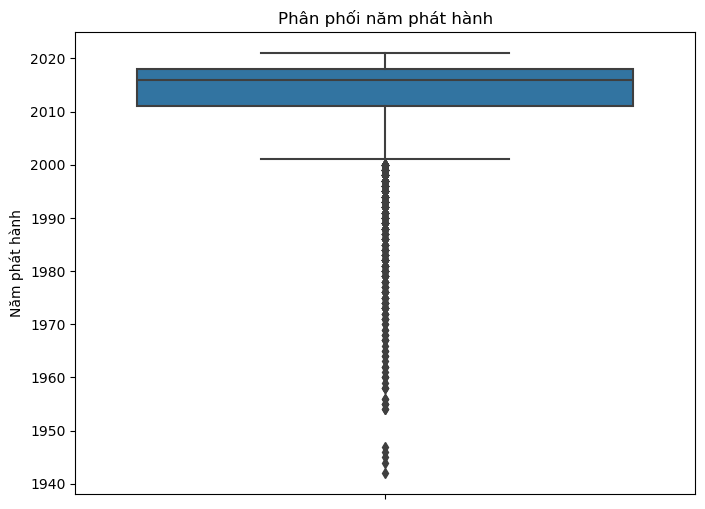

In [18]:

# Trích xuất dữ liệu từ cột 'duration'
duration_data = df_clean['duration']

# Chuyển đổi thời lượng từ chuỗi sang số
duration_data = duration_data.str.extract('(\d+)', expand=False).astype(int)

plt.figure(figsize=(8,6))
plt.boxplot(duration_data)
plt.ylabel('Thời lượng')
plt.title('Phân phối dữ liệu thời lượng')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(y='release_year',data=df_clean)
plt.title('Phân phối năm phát hành')
plt.ylabel('Năm phát hành')
plt.show()

## Heatmap

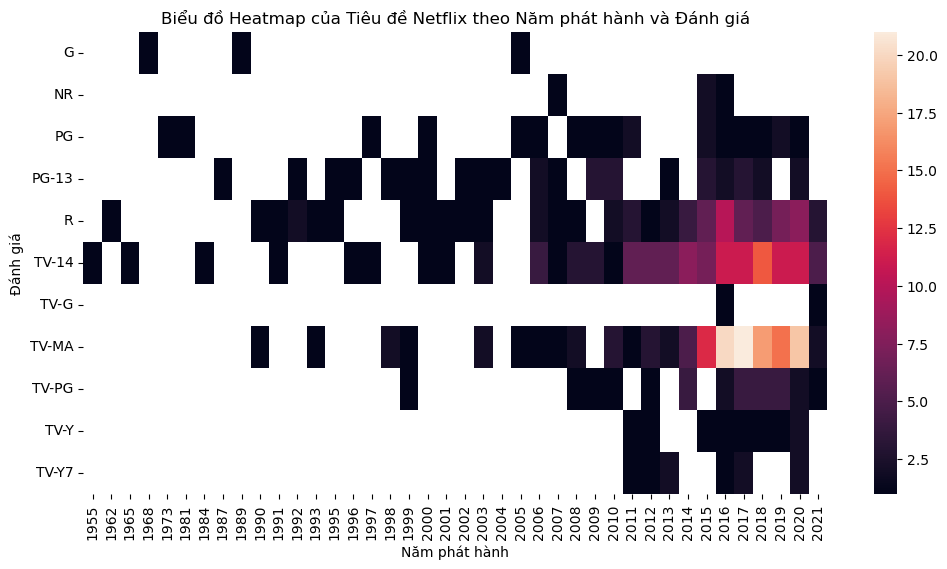

In [19]:
# Lấy một mẫu ngẫu nhiên chiếm 8% của dữ liệu
df_8 = df_clean.sample(frac=0.08)

# Tạo bảng pivot
pivot_table = df_8.pivot_table(index='rating', columns='release_year', values='show_id', aggfunc='count')

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table)
plt.title('Biểu đồ Heatmap của Tiêu đề Netflix theo Năm phát hành và Đánh giá')
plt.xlabel('Năm phát hành')
plt.ylabel('Đánh giá')
plt.show()

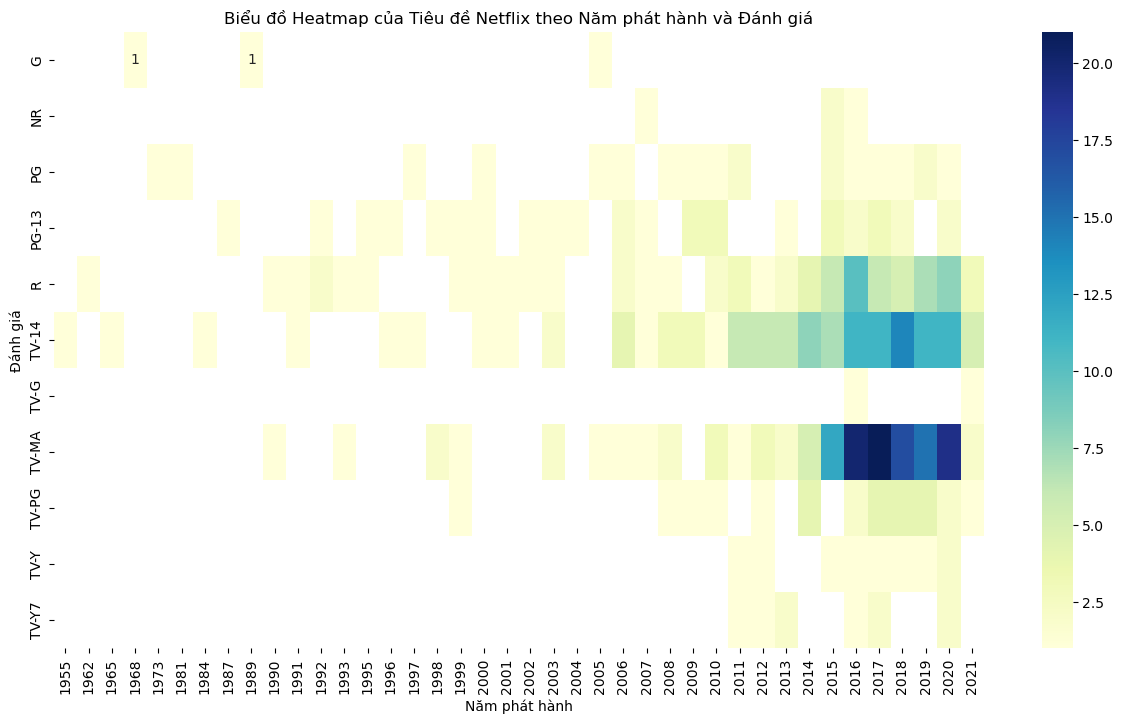

In [20]:
plt.figure(figsize=(15, 8))

sns.heatmap(pivot_table, cmap='YlGnBu',  annot=True)
plt.title('Biểu đồ Heatmap của Tiêu đề Netflix theo Năm phát hành và Đánh giá')
plt.xlabel('Năm phát hành')
plt.ylabel('Đánh giá')
plt.show()

## +6+6kde plot

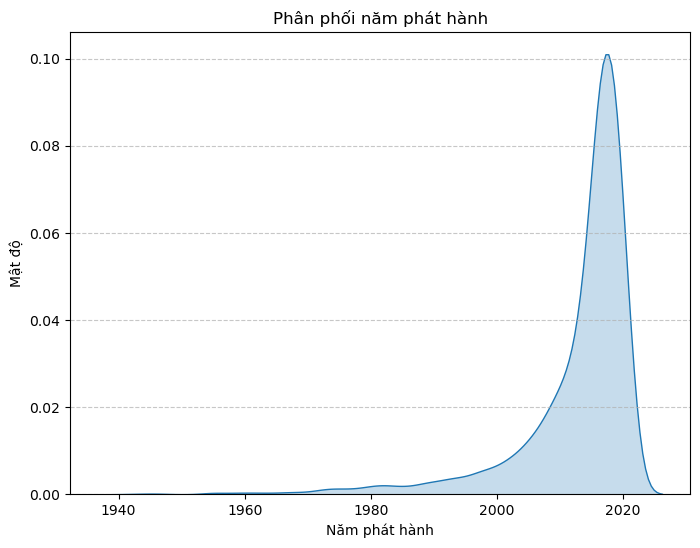

In [21]:
plt.figure(figsize=(8,6))
sns.kdeplot(x=df_clean['release_year'], shade=True)

plt.title('Phân phối năm phát hành')
plt.xlabel('Năm phát hành')
plt.ylabel('Mật độ')
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


## Violin plots

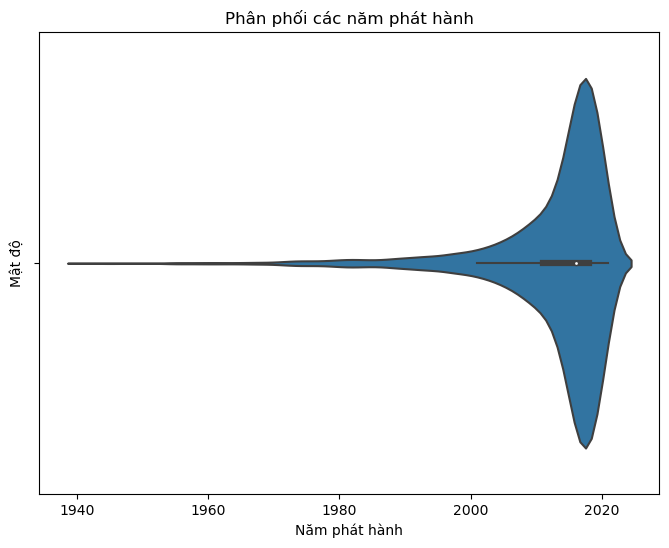

In [22]:
plt.figure(figsize=(8,6))
sns.violinplot(x='release_year', data=df_clean)

plt.xlabel('Năm phát hành')
plt.ylabel('Mật độ')
plt.title('Phân phối các năm phát hành')
plt.show()

## Count Plots

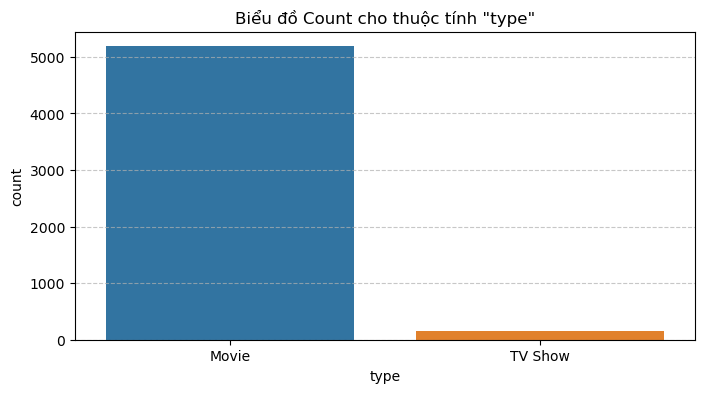

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(x='type', data=df_clean)

plt.title('Biểu đồ Count cho thuộc tính "type"')
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

## Joint Plots

<Figure size 1000x600 with 0 Axes>

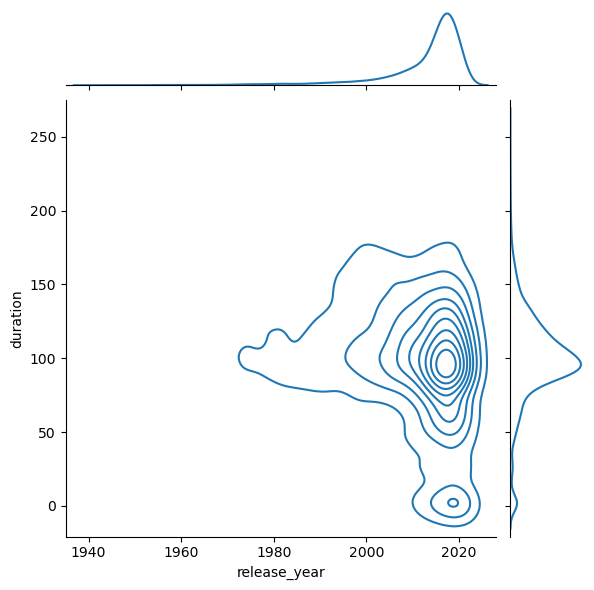

In [24]:
# Lọc dataframe
subset = df_clean[['release_year', 'duration']]

# Xóa các hàng chứa giá trị thiếu
subset = subset.dropna()

# Chuyển cột 'duration' thành biến số
subset['duration'] = subset['duration'].str.extract('(\d+)').astype(int)

plt.figure(figsize=(10,6))
sns.jointplot(x='release_year', y='duration', data=subset, kind='kde')
plt.show()

## Pair plot

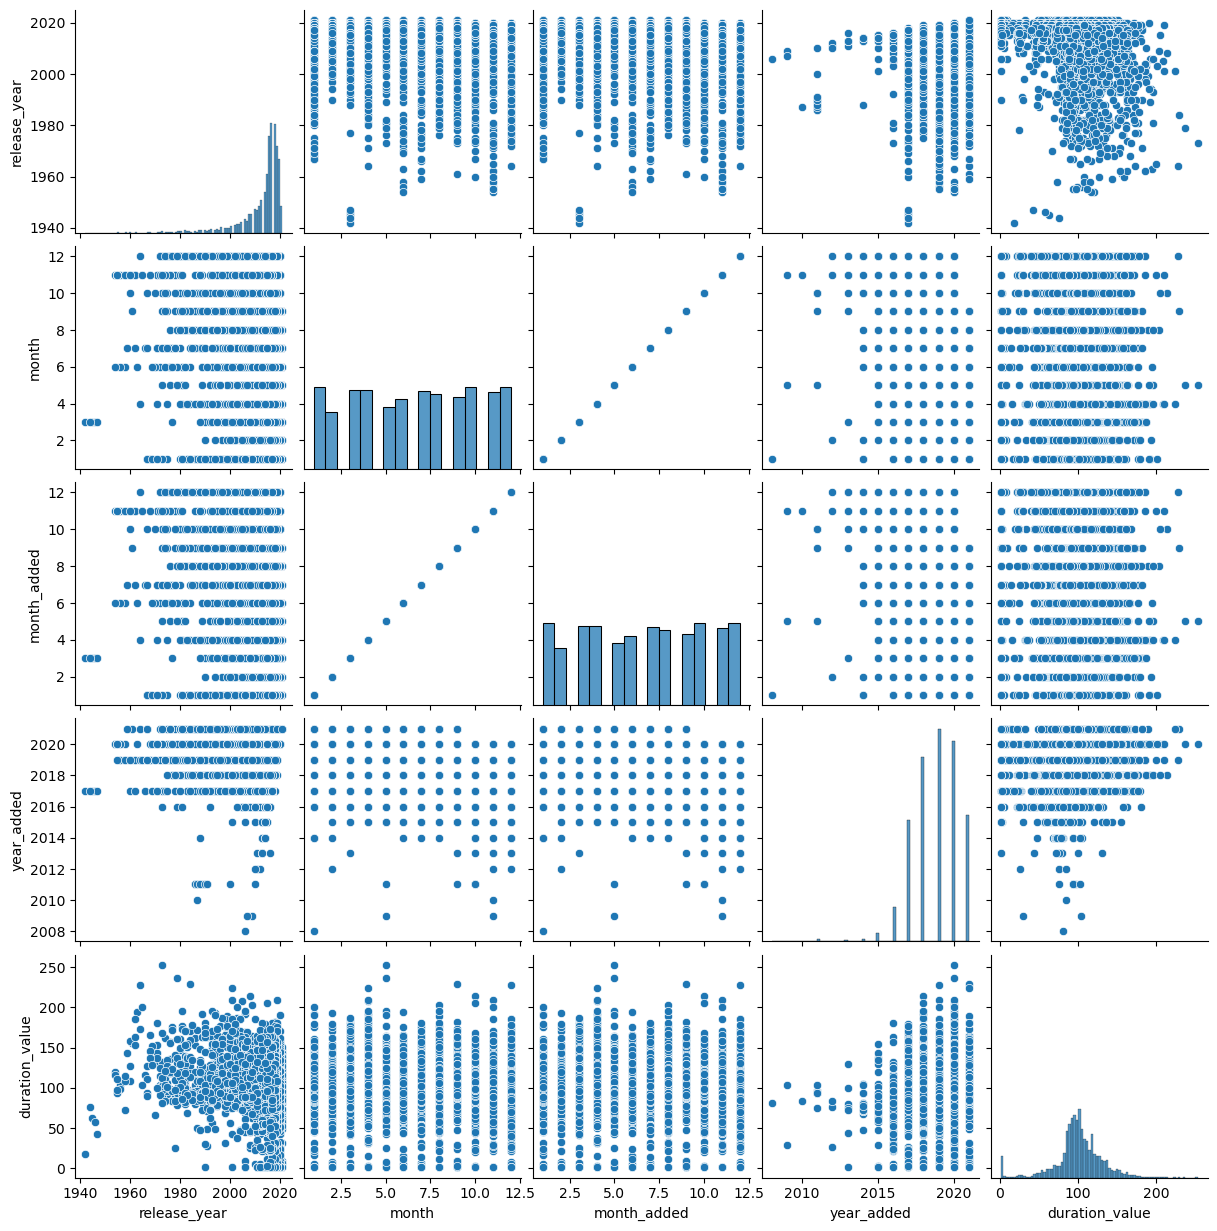

In [25]:
# Vẽ biểu đồ Pair plot
sns.pairplot(df_clean)
plt.show()

## Interactive Visualization with Bokeh

### Plotting as simple graph

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from pyspark.sql.functions import desc


# Giả định df_clean là Spark DataFrame của bạn
df_clean = spark.read.csv("netflix_titles.csv",header=True)
# Định nghĩa UDF (User Defined Function) để chuyển đổi cột duration trong Spark DataFrame
def convert_duration(duration):
    try:
        if 'min' in duration:
            return int(duration.replace('min', '').strip())
        elif 'Season' in duration:
            # Giả sử mỗi 'Season' có 450 phút
            number_of_seasons = int(duration.split()[0])
            return number_of_seasons * 450  # Thay đổi giá trị này tùy theo cách bạn muốn ước lượng cho 'Season'
        else:
            return None
    except Exception:
        return None

# Đăng ký UDF với PySpark
convert_duration_udf = udf(convert_duration, IntegerType())

# Áp dụng UDF để tạo cột mới trong Spark DataFrame
df_clean = df_clean.withColumn("duration_numeric", convert_duration_udf("duration"))

# Chuyển đổi Spark DataFrame sang Pandas DataFrame
df_pandas = df_clean.select("release_year", "duration_numeric")\
                    .orderBy(desc("duration_numeric"))\
                    .limit(10)\
                    .toPandas()

# Tiếp tục với việc loại bỏ các giá trị None nếu cần
df_pandas.dropna(subset=['duration_numeric'], inplace=True)

# Đoạn mã này giờ đây sẽ chạy mà không gặp lỗi
x_list = df_pandas["duration_numeric"].tolist()
y_list = df_pandas["release_year"].tolist()

output_notebook()
# Instantiate a figure
fig= figure(title="Release Year vs Duration")
# Create scatter circle marker plot by rendering the circles
fig.circle(x_list, y_list, size = 10, color = "red", alpha = 0.7)
# Show the plot
show(fig)

Loading BokehJS ...

## Glyphs

In [27]:
# Instantiate a figure
p = figure(width = 1000, height = 600)
# create a line plot
p.line(x_list, y_list, line_width = 1, color = "red")
# Show the plot
show(p)

## Layouts:

In [28]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.layouts import row

df_pandas = df_clean.toPandas()  # Chuyển Spark DataFrame df_clean sang Pandas DataFrame


# Giả sử df_pandas là DataFrame của Pandas đã chứa dữ liệu bạn cần
x_list = df_pandas['release_year']
y_list = df_pandas['duration_numeric'] 

output_notebook()

fig1 = figure(width = 300, height = 300)
fig2 = figure(width = 300, height = 300)
fig3 = figure(width = 300, height = 300)

# Vẽ các biểu đồ scatter
fig1.circle(y_list, x_list , size=8, color="green", alpha=0.5)
fig2.circle(x_list, y_list, size=8, color="blue", alpha=0.5)
fig3.circle(y_list, y_list, size=8, color="red", alpha=0.5)

# Tạo row layout và hiển thị biểu đồ
row_layout = row(fig1, fig2, fig3)
show(row_layout)

print(df_pandas.columns)

Loading BokehJS ...

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'duration_numeric'],
      dtype='object')


In [29]:
# Create column layout
#col_layout = column(fig1, fig2, fig3)
# Show the plot
#show(col_layout)

In [30]:
# Import the required modules
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.layouts import gridplot
# Import iris flower dataset as pandas DataFrame
from bokeh.sampledata.iris import flowers as df
# Output to notebook
output_notebook()
# Instantiate a figure
fig1 = figure(width = 300, height = 300)
fig2 = figure(width = 300, height = 300)
fig3 = figure(width = 300, height = 300)
# Create scatter marker plot by render the circles
fig1.circle(df_pandas['duration_numeric'], df_pandas['release_year'], size=8, color = "green", alpha = 0.5)
fig2.circle(df_pandas['release_year'], df_pandas['duration_numeric'], size=8, color = "blue", alpha = 0.5)
fig3.circle(df_pandas['duration_numeric'], df_pandas['duration_numeric'], size=8, color = "red", alpha = 0.5)
# Create a grid layout
grid_layout = gridplot([[fig1, fig2], [None,fig3]])
# Show the plot
show(grid_layout)

Loading BokehJS ...

## Nested Layout using Row and Column Layout

In [31]:
# Import the required modules
from bokeh.plotting import figure, output_notebook, show
# Import the required modules
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.layouts import row, column
# Import iris flower dataset as pandas DataFrame
from bokeh.sampledata.iris import flowers as df

x_list = df_pandas['release_year']
y_list = df_pandas['duration_numeric'] 

# Output to notebook
output_notebook()
# Instantiate a figure
fig1 = figure(width = 300, height = 300)
fig2 = figure(width = 300, height = 300)
fig3 = figure(width = 300, height = 300)
# Create scatter marker plot by render the circles
fig1.circle(df_pandas['duration_numeric'], df_pandas['release_year'], size=8, color = "green", alpha = 0.5)
fig2.circle(df_pandas['release_year'], df_pandas['duration_numeric'], size=8, color = "blue", alpha = 0.5)
fig3.circle(df_pandas['duration_numeric'], df_pandas['duration_numeric'], size=8, color = "red", alpha = 0.5)
# Create nested layout
nasted_layout = row(fig1, column(fig2, fig3))
# Show the plot
show(nasted_layout)

Loading BokehJS ...

## Multiple Plots

In [32]:
# Import the required modules
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.layouts import gridplot
# Import iris flower dataset as pandas DataFrame
from bokeh.sampledata.iris import flowers as df
# Output to notebook
output_notebook()
# Instantiate a figure
fig1 = figure(width = 300, height = 300)
fig2 = figure(width = 300, height = 300)
fig3 = figure(width = 300, height = 300)
# Create scatter marker plot by render the circles
fig1.circle(df_pandas['duration_numeric'], df_pandas['release_year'], size=8, color = "green", alpha = 0.5)
fig2.circle(df_pandas['release_year'], df_pandas['duration_numeric'], size=8, color = "blue", alpha = 0.5)
fig3.circle(df_pandas['duration_numeric'], df_pandas['duration_numeric'], size=8, color = "red", alpha = 0.5)
# Create a grid layout
grid_layout = gridplot([[fig1, fig2], [None,fig3]])
# Show the plot
show(grid_layout)

Loading BokehJS ...

## Interactions: Hide Click Policy

In [33]:
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.models import CategoricalColorMapper
from bokeh.sampledata.iris import flowers as df

output_notebook()

# Tạo đối tượng figure
fig = figure( title="Duration and Release",  x_axis_label='Realease Year', y_axis_label= 'Duaration')

# Vẽ biểu đồ scatter cho mỗi loài
for specie, color in zip(['setosa', 'virginica', 'versicolor'], ['blue', 'green', 'red']):
    data = df[df.species == specie]
    fig.circle(df_pandas['duration_numeric'], df_pandas['release_year'], size=8, color=color, alpha=0.7, legend_label=specie, source=data)

# Thiết lập vị trí và chính sách click cho legend
fig.legend.location = 'top_left'
fig.legend.click_policy = "hide"

# Hiển thị biểu đồ
show(fig)

Loading BokehJS ...

RuntimeError: 

Expected x and y to reference fields in the supplied data source.

When a 'source' argument is passed to a glyph method, values that are sequences
(like lists or arrays) must come from references to data columns in the source.

For instance, as an example:

    source = ColumnDataSource(data=dict(x=a_list, y=an_array))

    p.circle(x='x', y='y', source=source, ...) # pass column names and a source

Alternatively, *all* data sequences may be provided as literals as long as a
source is *not* provided:

    p.circle(x=a_list, y=an_array, ...)  # pass actual sequences and no source



## Interactions: Mute Click Policy

In [ ]:
# Import the required modules
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.models import CategoricalColorMapper
# Import iris flower dataset as pandas DataFrame
from bokeh.sampledata.iris import flowers as df
# Output to notebook
output_notebook()
# Instantiate a figure object
fig = figure( title="Petal length Vs.Petal Width", x_axis_label='petal_length', y_axis_label='petal_width')
# Create scatter marker plot by render the circles
for specie, color in zip(['setosa', 'virginica','versicolor'], ['blue',
'green', 'red']):
 data = df[df.species==specie]
 fig.circle('petal_length', 'petal_width', size=8, color=color, alpha =
0.7,legend_label=specie,source=data,
 muted_color=color, muted_alpha=0.2)
# Set the legend location and click policy
fig.legend.location = 'top_left'
fig.legend.click_policy="mute"
# Show the plot
show(fig)

## Annotations

In [ ]:
# Import the required modules
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show 
from bokeh.models import CategoricalColorMapper

# Import iris flower dataset as pandas DataFrame
from bokeh.sampledata.iris import flowers as df

# Output to notebook 
output_notebook() 

# Create color mapper for categorical column 
color_mapper = CategoricalColorMapper(factors=['setosa', 'virginica', 'versicolor'],  palette=['blue', 'green', 'red'])

color_dict={'field': 'species','transform': color_mapper }

# Instantiate a figure object 
p = figure(width = 1000, height = 600, title="Petal length Vs. Petal Width", 
           x_axis_label='petal_length', y_axis_label='petal_width')

# Create scatter marker plot by render the circles  
p.circle('petal_length', 'petal_width', size=8, color=color_dict, alpha = 0.5, legend_group='species', source=df)

# Set the legend location
p.legend.location = 'top_left'

# Show the plot
show(p)

## Annotations: Hover Tool

In [ ]:
# Import the required modules
from bokeh.plotting import figure 
from bokeh.plotting import output_notebook
from bokeh.plotting import show 
from bokeh.models import CategoricalColorMapper
from bokeh.models import HoverTool

# Import iris flower dataset as pandas DataFrame
from bokeh.sampledata.iris import flowers as df

# Output to notebook 
output_notebook() 

# Create color mapper for categorical column 
mapper = CategoricalColorMapper(factors=['setosa', 'virginica', 'versicolor'], 
                                palette=['blue', 'green', 'red'])

color_dict={'field': 'species','transform': mapper}

# Create hovertool and specify the hovering information
hover = HoverTool(tooltips=[('Species type','@species'),
                            ('IRIS Petal Length','@petal_length'),
                            ('IRIS Petal Width', '@petal_width')])

# Instantiate a figure object
p = figure(plot_width = 500, plot_height = 350, title="Petal length Vs. Petal Width", 
           x_axis_label='petal_length', y_axis_label='petal_width',
           tools=[hover, 'pan', 'wheel_zoom'])

# Create scatter marker plot by render the circles  
p.circle('petal_length', 'petal_width', size=8, color=color_dict, alpha = 0.5,legend_group='species',source=df)

# Set the legend location
p.legend.location = 'top_left'

# Show the plot
show(p)


## Widgets: Tab Panel

In [ ]:
# Import the required modules
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show 
from bokeh.models.widgets import Tabs
from bokeh.models.widgets import Panel

# Import iris flower dataset as pandas DataFrame
from bokeh.sampledata.iris import flowers as df

# Output to notebook 
output_notebook() 

# Instantiate a figure 
fig1 = figure(plot_width = 300, plot_height = 300)
fig2 = figure(plot_width = 300, plot_height = 300)

# Create scatter marker plot by render the circles  
fig1.circle(df['petal_length'], df['sepal_length'], size=8,  color = "green", alpha = 0.5)
fig2.circle(df['petal_length'], df['sepal_width'], size=8,  color = "blue", alpha = 0.5)


# Create panels 
tab1 = Panel(child=fig1, title='tab1')
tab2 = Panel(child=fig2, title='tab2')

# Create tab by putting panels into it
tab_layout = Tabs(tabs=[tab1,tab2])

# Show the plot
show(tab_layout)


In [ ]:
# Import the required modules
from bokeh.plotting import Figure 
from bokeh.plotting import output_notebook 
from bokeh.plotting import show
from bokeh.models import CustomJS 
from bokeh.models import ColumnDataSource
from bokeh.models import Slider
from bokeh.layouts import column

# Show output in notebook 
output_notebook() 

# Create list of data
x = [x for x in range(0, 100)]
y = x

# Create a DataFrame
df = ColumnDataSource(data={"x_values":x, "y_values":y})

# Instantiate the Figure object 
fig = Figure(plot_width=350, plot_height=350)

# Create a line plot  
fig.line('x_values', 'y_values', source=df, line_width=2.5, line_alpha=0.8)

# Create a callback using CustomJS
callback = CustomJS(args=dict(source=df), code="""
    var data = source.data;
    var f = cb_obj.value
    var x_values = data['x_values']
    var y_values = data['y_values']
    for (var i = 0; i < x_values.length; i++) {
        y_values[i] = Math.pow(x_values[i], f)
    }
    source.change.emit();
""")

slider_widget = Slider(start=0.0, end=10, value=1, step=.1, title="Display power of x")

slider_widget.js_on_change('value', callback)

# Create layout
slider_widget_layout = column(fig,slider_widget)

# Display the layout
show(slider_widget_layout)